# VMD

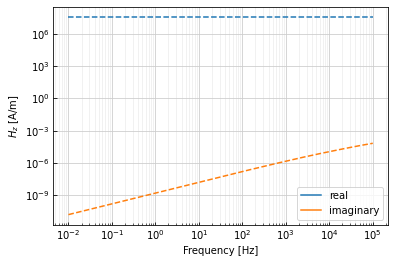

In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')
import emulatte.forward as fwd
import ex1dem.w1dem as w1dem

#emulatte
thicks = [20, 50, 200, 50]
res = [100, 80, 10, 80, 100]
tc = [0, 0, -10]
rc = [10, 0, -10]
freqs = np.logspace(-2, 5, 301)

model = fwd.model(thicks)
vmd = fwd.transmitter('VED', freqs, ds=0.05, current=1)
model.add_resistivity(res)
model.locate(vmd, tc, rc)
ans, freqtime = model.emulate(hankel_filter='key201')


resp = ans['e_z'].real
imsp = ans['e_z'].imag
plt.plot(freqtime, resp, "C0-", label='real')
plt.plot(freqtime, -resp, "C0--")
plt.plot(freqtime, imsp, "C1-", label='imaginary')
plt.plot(freqtime, -imsp, "C1--")
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

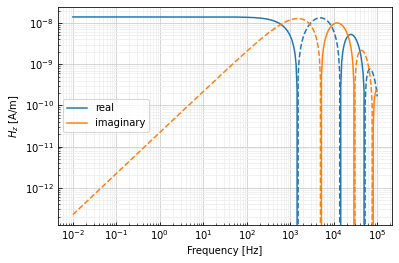

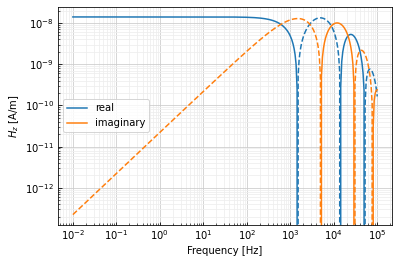

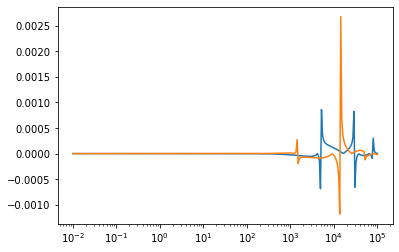

In [13]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')
import emulatte.forward as fwd
import ex1dem.w1dem as w1dem

#emulatte
thicks = [20, 5, 2, 5]
res = [100, 80, 10, 80, 100]
tc = [0, 0, 100]
rc = [100, 0, 200]
freqs = np.logspace(-2, 5, 301)

model = fwd.model(thicks)
vmd = fwd.transmitter('HMDx', freqs, dipole_moment=1)
model.add_resistivity(res)
model.locate(vmd, tc, rc)
ans, _ = model.emulate(hankel_filter='key201')

#w1dem
fdtd = 1
tx = [0]
ty = [0]
tz = [100]
rx = [100]
ry = [0]
rz = [200]

dipole_mom = 1
thickness = [20, 5, 2, 5]
res = np.array([100, 80, 10, 80, 100])
freqtime = np.logspace(-2, 5, 301)
plot_number = len(freqtime)
hankel_filter = "key201"
dbdt = 1

w1dem_fdem = w1dem.Fdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, freqtime)

bns, _ = w1dem_fdem.hmdx(dipole_mom=dipole_mom)

resp = ans['h_x'].real
imsp = ans['h_x'].imag
plt.plot(freqtime, resp, "C0-", label='real')
plt.plot(freqtime, -resp, "C0--")
plt.plot(freqtime, imsp, "C1-", label='imaginary')
plt.plot(freqtime, -imsp, "C1--")
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

respb = bns['h_x'].real
imspb = bns['h_x'].imag
plt.plot(freqtime, respb, "C0-", label='real')
plt.plot(freqtime, -respb, "C0--")
plt.plot(freqtime, imspb, "C1-", label='imaginary')
plt.plot(freqtime, -imspb, "C1--")
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

respe = abs(resp-respb)/respb * 100
imspe = abs(imsp-imspb)/imspb * 100
plt.plot(freqtime, imspe)
plt.plot(freqtime, respe)
#plt.yscale('log')
plt.xscale('log')
plt.show()

In [15]:
x = 1 + 2j
y = x.conjugate()
(abs(x * y))

5.0